# Rainfall Prediction using Liner Regression

In [1]:
#importing  the libraries
import numpy as np
import pandas as pd

In [2]:
#read the data
data=pd.read_csv("austin_weather.csv")
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [3]:
#Drop unnecessary columns
data=data.drop(["Date","Events","SeaLevelPressureLowInches"],axis=1)

In [4]:
data=data.replace("T",0.0)

In [5]:
data=data.replace("-",0.0)

In [6]:
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0


In [7]:
data.to_csv("austin_weather_final.csv")

In [9]:
# importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv("austin_weather_final.csv")
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [25]:
X=data.drop(["PrecipitationSumInches"],axis=1)

In [27]:
Y=data["PrecipitationSumInches"]

In [33]:
# reshipping it into 2d vector
Y=Y.values.reshape(-1,1)

In [37]:
day_index=798
days=[i for i in range(Y.size)]

In [39]:
#initialise the linear regression classifier
clf=LinearRegression()
#train the classifier
clf.fit(X,Y)

LinearRegression()

 The precipition trend graph:


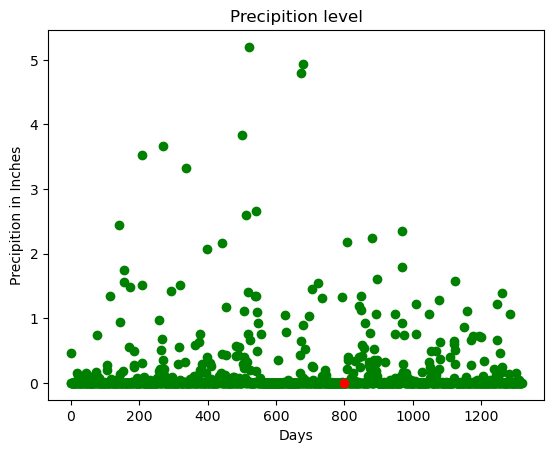

In [71]:
# plot a graph
print(" The precipition trend graph:")
plt.scatter(days,Y,color="g")
plt.scatter(days[day_index],Y[day_index],color="r")
plt.title("Precipition level")
plt.xlabel("Days")
plt.ylabel("Precipition in Inches")
plt.show()
x_vis=x.filter(["empAvgF","DewPointAvgF","HumidityAvgPercent","SeaLevelPressureAvgInches","VisibilityAvgMiles","WindAvgMPH"])

 The precipition VS attributes trend graph:


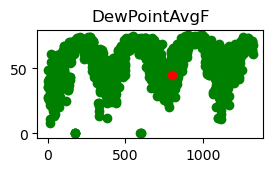

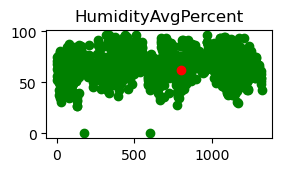

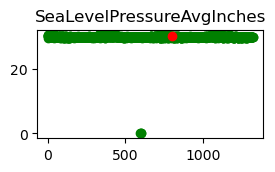

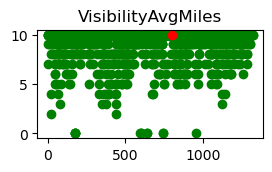

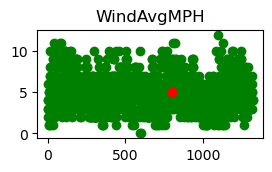

In [107]:
print(" The precipition VS attributes trend graph:")
for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days,x_vis[x_vis.columns.values[i][:100]],color="g")
    plt.scatter(days[day_index], x_vis[x_vis.columns[i]].values[day_index], color="r")
    plt.title(x_vis.columns.values[i])
    plt.show()

# Rainfall Prediction using correlation analysis

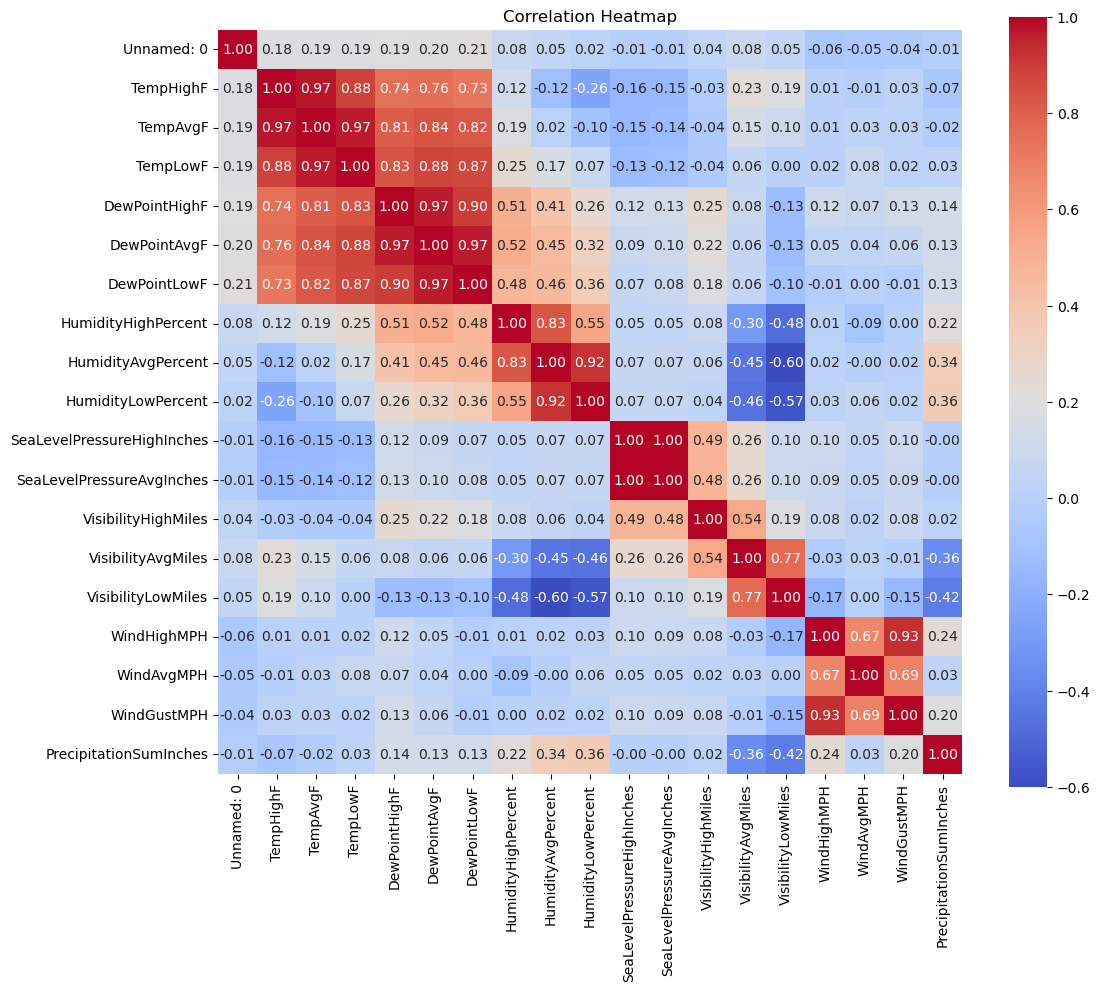

PrecipitationSumInches        1.000000
HumidityLowPercent            0.359194
HumidityAvgPercent            0.341382
WindHighMPH                   0.241838
HumidityHighPercent           0.219735
WindGustMPH                   0.200363
DewPointHighF                 0.136159
DewPointAvgF                  0.127040
DewPointLowF                  0.126493
TempLowF                      0.034315
WindAvgMPH                    0.033660
VisibilityHighMiles           0.023162
SeaLevelPressureHighInches   -0.000619
SeaLevelPressureAvgInches    -0.001954
Unnamed: 0                   -0.014928
TempAvgF                     -0.020442
TempHighF                    -0.069869
VisibilityAvgMiles           -0.360945
VisibilityLowMiles           -0.421734
Name: PrecipitationSumInches, dtype: float64

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation heatmap to identify relationships between features and PrecipitationSumInches
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Identify top correlated features with PrecipitationSumInches
top_correlated_features = correlation_matrix["PrecipitationSumInches"].sort_values(ascending=False)
top_correlated_features


<h3>The correlation analysis shows the following key insights:<h3><h4>Strongest Positive Correlations with PrecipitationSumInches:</h4>

<br>HumidityLowPercent (0.36)
<br>HumidityAvgPercent (0.34)
<br>WindHighMPH (0.24)
<br>HumidityHighPercent (0.22)

<br><h4>Strongest Negative Correlations:</h4>

<br>VisibilityLowMiles (-0.42)
<br>VisibilityAvgMiles (-0.36)
<br>These features (high humidity, high wind, and low visibility) align well with weather conditions indicative of precipitation.

The precipitation data appears highly skewed, with many zero values (no rain). This might require careful handling during prediction (e.g., applying log transformation or treating it as a classification problem for rain vs. no rain).